<a href="https://colab.research.google.com/github/najla25naena/codsoft/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,f1_score,classification_report,accuracy_score

df=pd.read_csv('/content/fraudTest.csv')
df1=pd.read_csv('/content/fraudTrain.csv')

In [ ]:
fulldata=pd.concat([df,df1])

In [ ]:
fulldata.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
fulldata.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [ ]:
fulldata.isna().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
fulldata['merch_long'].fillna(fulldata['merch_long'].median(),inplace=True)
fulldata['is_fraud'].fillna(fulldata['is_fraud'].mode()[0],inplace=True)
fulldata['cc_num'].fillna(fulldata['cc_num'].mode(),inplace=True)
fulldata['category'].fillna(fulldata['category'].mode(),inplace=True)
fulldata['amt'].fillna(fulldata['amt'].median(),inplace=True)
fulldata['last'].fillna(fulldata['last'].mode()[0],inplace=True)
fulldata['street'].fillna(fulldata['street'].mode()[0],inplace=True)
fulldata['city'].fillna(fulldata['city'].mode()[0],inplace=True)
fulldata['zip'].fillna(fulldata['zip'].mode()[0],inplace=True)
fulldata['lat'].fillna(fulldata['lat'].median(),inplace=True)
fulldata['long'].fillna(fulldata['long'].mode()[0],inplace=True)
fulldata['city_pop'].fillna(fulldata['city_pop'].median(),inplace=True)
fulldata['job'].fillna(fulldata['job'].mode()[0],inplace=True)
fulldata['dob'].fillna(fulldata['dob'].mode()[0],inplace=True)
fulldata['state'].fillna(fulldata['state'].mode()[0],inplace=True)
fulldata['trans_num'].fillna(fulldata['trans_num'].mode()[0],inplace=True)
fulldata['unix_time'].fillna(fulldata['unix_time'].median(),inplace=True)
fulldata['merch_lat'].fillna(fulldata['merch_lat'].mean(),inplace=True)
fulldata['gender'].fillna(fulldata['gender'].mode()[0],inplace=True)
fulldata.isna().sum()


<ipython-input-13-cda547daef7b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fulldata['merch_long'].fillna(fulldata['merch_long'].median(),inplace=True)
<ipython-input-13-cda547daef7b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


<Axes: xlabel='is_fraud', ylabel='count'>

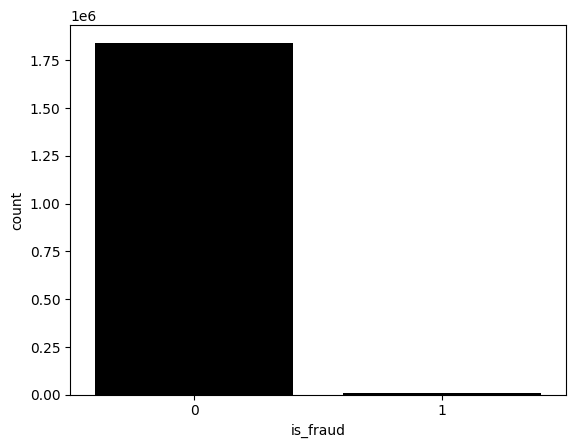

In [ ]:
sns.countplot(x='is_fraud',data=fulldata,color='black')

In [ ]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               

In [ ]:
fulldata.duplicated().sum()

0

In [ ]:
fraud=fulldata[fulldata['is_fraud']==1]
fraud_not=fulldata[fulldata['is_fraud']==0]
print(fraud.shape[0])
print(fraud_not.shape[0])

9651
1842743


In [ ]:
fraud_not=fraud_not.sample(fraud.shape[0])
data=pd.concat([fraud,fraud_not])
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,2020-06-21 22:06:39,3560725013359375,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,2020-06-21 22:32:22,6564459919350820,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,2020-06-21 22:37:27,6564459919350820,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,2020-06-21 22:38:55,4005676619255478,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,2020-06-21 23:02:16,3560725013359375,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326835,326835,2020-10-24 16:17:23,342360239917375,fraud_Hirthe-Beier,health_fitness,64.89,Gabriella,Jordan,F,1299 Joshua Plains,...,42.7045,-74.3648,1304,Jewellery designer,1970-06-09,8c0456c974437919a63142eb1123e547,1382631443,42.436747,-73.671708,0
828055,828055,2019-12-10 01:55:31,3565196229855512,fraud_Stracke-Lemke,grocery_pos,65.62,Adriana,Harvey,F,715 Joy Prairie,...,40.4815,-92.9951,3805,"Investment banker, corporate",1950-09-15,0cbcff9bad1ef5c6cebd93851ac49fe0,1355104531,41.165133,-92.003970,0
339530,339530,2019-06-09 17:07:33,3595192916105588,fraud_Larkin Ltd,kids_pets,126.79,Dustin,Roberts,M,3283 James Station,...,35.0583,-79.0080,238602,"Scientist, research (maths)",1993-05-14,e56b19a2142af171ea0feeb9ead2e706,1339261653,35.604037,-79.751749,0
600272,600272,2019-09-12 03:54:31,3577663406369449,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1.24,Cody,Hooper,M,7233 John Parks,...,35.6069,-90.3359,2470,Counselling psychologist,1968-10-06,81aa1053e975db6a696bd84fc126d25a,1347422071,35.132188,-91.263488,0


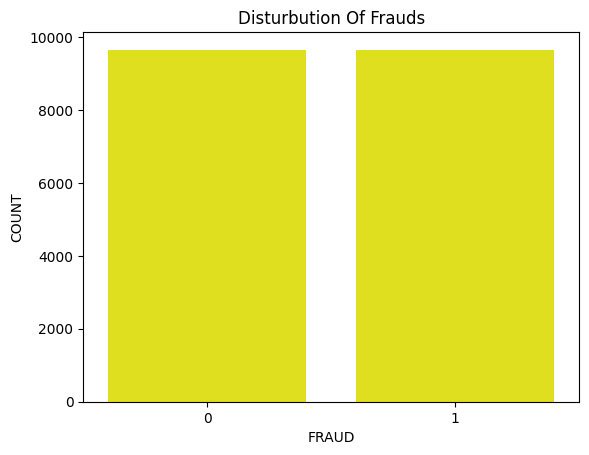

In [ ]:
count_fraud=data['is_fraud'].value_counts()
sns.barplot(x=count_fraud.index,y=count_fraud.values,color='yellow')
plt.title('Disturbution Of Frauds')
plt.xlabel('FRAUD')
plt.ylabel('COUNT')
plt.show()

In [ ]:
data.drop(columns=['Unnamed: 0','merchant','first','last','street','gender','job','dob','trans_num',	'unix_time','city','state'],inplace=True)
data


,trans_date_trans_time,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
1685,2020-06-21 22:06:39,3560725013359375,health_fitness,24.84,79759,31.8599,-102.7413,23,32.575873,-102.604290,1
1767,2020-06-21 22:32:22,6564459919350820,misc_net,780.52,53803,42.5545,-90.3508,1306,42.461127,-91.147148,1
1781,2020-06-21 22:37:27,6564459919350820,entertainment,620.33,53803,42.5545,-90.3508,1306,42.771834,-90.158365,1
1784,2020-06-21 22:38:55,4005676619255478,shopping_net,1077.69,70726,30.4590,-90.9027,71335,31.204974,-90.261595,1
1857,2020-06-21 23:02:16,3560725013359375,shopping_pos,842.65,79759,31.8599,-102.7413,23,31.315782,-102.736390,1
...,...,...,...,...,...,...,...,...,...,...,...
326835,2020-10-24 16:17:23,342360239917375,health_fitness,64.89,12092,42.7045,-74.3648,1304,42.436747,-73.671708,0
828055,2019-12-10 01:55:31,3565196229855512,grocery_pos,65.62,63565,40.4815,-92.9951,3805,41.165133,-92.003970,0
339530,2019-06-09 17:07:33,3595192916105588,kids_pets,126.79,28314,35.0583,-79.0080,238602,35.604037,-79.751749,0
600272,2019-09-12 03:54:31,3577663406369449,shopping_net,1.24,72354,35.6069,-90.3359,2470,35.132188,-91.263488,0


In [ ]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data ['trans_day']=data['trans_date_trans_time'].dt.day
data ['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)

In [ ]:
data['category'].unique()

array(['health_fitness', 'misc_net', 'entertainment', 'shopping_net',
       'shopping_pos', 'misc_pos', 'grocery_pos', 'grocery_net',
       'personal_care', 'home', 'gas_transport', 'travel', 'food_dining',
       'kids_pets'], dtype=object)

In [ ]:
lb=LabelEncoder()
data['category']=lb.fit_transform(data['category'])

In [ ]:
num_col=['amt','zip','cc_num','city_pop']
scaler=StandardScaler()
data[num_col]=scaler.fit_transform(data[num_col])


In [ ]:
x=data.drop('is_fraud',axis=1)
x

,cc_num,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,trans_day,trans_month,trans_year,trans_hour,trans_minute
1685,-0.310326,5,-0.726263,1.168226,31.8599,-102.7413,-0.294764,32.575873,-102.604290,21,6,2020,22,6
1767,-0.307995,8,1.269711,0.205406,42.5545,-90.3508,-0.290655,42.461127,-91.147148,21,6,2020,22,32
1781,-0.307995,0,0.846602,0.205406,42.5545,-90.3508,-0.290655,42.771834,-90.158365,21,6,2020,22,37
1784,-0.309981,11,2.054624,0.833153,30.4590,-90.9027,-0.066354,31.204974,-90.261595,21,6,2020,22,38
1857,-0.310326,12,1.433814,1.168226,31.8599,-102.7413,-0.294764,31.315782,-102.736390,21,6,2020,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326835,-0.312824,5,-0.620479,-1.341834,42.7045,-74.3648,-0.290661,42.436747,-73.671708,24,10,2020,16,17
828055,-0.310323,4,-0.618551,0.567521,40.4815,-92.9951,-0.282650,41.165133,-92.003970,10,12,2019,1,55
339530,-0.310299,7,-0.456983,-0.740090,35.0583,-79.0080,0.469398,35.604037,-79.751749,9,6,2019,17,7
600272,-0.310313,11,-0.788597,0.893542,35.6069,-90.3359,-0.286926,35.132188,-91.263488,12,9,2019,3,54


In [ ]:
y=data['is_fraud']
y

,is_fraud
1685,1
1767,1
1781,1
1784,1
1857,1
...,...
326835,0
828055,0
339530,0
600272,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
Y_predict=model.predict(x_test)
Y_predict

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
print('Accuracy:', accuracy_score(y_test, Y_predict))
print('Classification_report:',classification_report(y_test,Y_predict))
print('F1 score:', f1_score (y_test, Y_predict))
print('Confusion matrix:', confusion_matrix (y_test,Y_predict))

Accuracy: 0.9633914695216715
Classification_report:               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2896
           1       0.97      0.96      0.96      2895

    accuracy                           0.96      5791
   macro avg       0.96      0.96      0.96      5791
weighted avg       0.96      0.96      0.96      5791

F1 score: 0.9632072197153766
Confusion matrix: [[2804   92]
 [ 120 2775]]


Text(0.5, 1.0, 'Confusion Matrix')

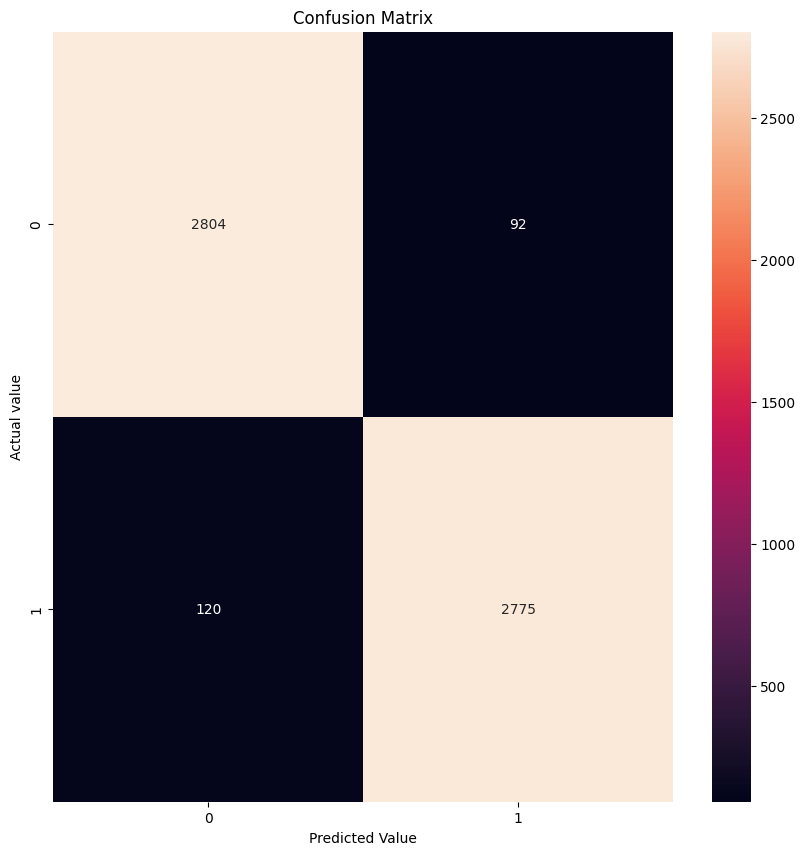

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, Y_predict), annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel ('Actual value')
plt.title( 'Confusion Matrix')